In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import regex  as r


In [12]:
file_path = f"D:\\Data Science\\Intro to Data Science\\Coursework\\dataset\\"
print(f"File path : {file_path}")
if os.path.exists(file_path) and os.listdir(file_path):
    file_list_in = os.listdir(file_path)
    for file in os.listdir(file_path):
        file_name = os.path.join(file_path,file)
        if os.path.isfile(file_name) and file_name.endswith('.csv'):
            #calculate_HRV_metrics(file_name)
            print(f"File name is {file_name}")
        #else:
        #    print(f"File name is {file_name}")
        #    print("Please check the file format")
else:
    print("File doesnt exist in the given path. Please check the path")


File path : D:\Data Science\Intro to Data Science\Coursework\dataset\
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\o01.csv
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\o02.csv
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\o03.csv
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\o04.csv
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\o05.csv
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\o06.csv
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\o07.csv
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\o08.csv
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\o09.csv
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\o10.csv
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\y01.csv
File name is D:\Data Science\Intro to Data Science\Coursework\dataset\y0

In [6]:
file_in="D:\\Data Science\\Intro to Data Science\\Coursework\\dataset\\y01.csv"
hrv_results = []
results = {}

ecg_data = pd.read_csv(file_in)
N_type = ecg_data[ecg_data['type']=='N']
N_type_copy = N_type.copy()
N_type_copy['time_next'] = N_type['time'].shift(-1)
N_type_copy['type_next'] = N_type['type'].shift(-1)
N_type_copy['rr'] = N_type_copy['time_next']-N_type_copy['time']
N_type_copy['rr_type'] = N_type_copy['type']+N_type_copy['type_next']
N_type_copy['rr_next'] = N_type_copy['rr'].shift(-1)
N_type_copy['diff'] = N_type_copy['rr_next']-N_type_copy['rr']
N_type_copy['diff_squared'] = N_type_copy['diff']**2
N_type_copy['rr_next_type'] =N_type_copy['rr_type'].shift(-1)

In [5]:
N_type

,time,type
0,208,N
1,944,N
2,1688,N
3,2440,N
4,3196,N
...,...,...
8705,7220600,N
8706,7221864,N
8707,7222916,N
8708,7223760,N


In [2]:
file_in="D:\\Data Science\\Intro to Data Science\\Coursework\\dataset\\y01.csv"
hrv_results = []
results = {}

ecg_data = pd.read_csv(file_in)
N_type = ecg_data[ecg_data['type']=='N']

N_type['time_next'] = N_type['time'].shift(-1)
N_type['type_next'] = N_type['type'].shift(-1)
N_type['rr'] = N_type['time_next']-N_type['time']
N_type['rr_type'] = N_type['type']+N_type['type_next']
N_type['rr_next'] = N_type['rr'].shift(-1)
N_type['diff'] = N_type['rr_next']-N_type['rr']
N_type['diff_squared'] = N_type['diff']**2
N_type['rr_next_type'] =N_type['rr_type'].shift(-1)

mean_nn = int(np.round(N_type['rr'].mean(),decimals=0))
mean_bpm = np.round((1000/mean_nn)*60,decimals=1)
sdnn = np.round(np.sqrt(N_type['diff_squared'].sum()/(N_type.shape[0]-1)),decimals=1)
rmssd = np.round(np.sqrt(N_type['diff_squared'].mean()),decimals=1)
pnn50 = np.round(100 * sum(np.abs(N_type['diff']) > 50) / N_type.shape[0]-1,decimals=1)
pnn20 = np.round(100 * sum(np.abs(N_type['diff']) > 20) / N_type.shape[0]-1,decimals=1)
results['filename'] = file_in
results['n'] = N_type.shape[0]
results['mean_nn'] = mean_nn
results['mean_bpm'] = mean_bpm
results['sdnn'] = sdnn
results['rmssd'] = rmssd
results['pnn20'] = pnn20
results['pnn50'] = pnn50
hrv_results.append(results)
#print(N_type)
#print(ecg_data.shape)
#print(ecg_data)
print(results)
print(hrv_results)
N_type.head(5)

{'filename': 'D:\\Data Science\\Intro to Data Science\\Coursework\\dataset\\y01.csv', 'n': 8708, 'mean_nn': 830, 'mean_bpm': 72.3, 'sdnn': 92.3, 'rmssd': 92.3, 'pnn20': 74.3, 'pnn50': 46.0}
[{'filename': 'D:\\Data Science\\Intro to Data Science\\Coursework\\dataset\\y01.csv', 'n': 8708, 'mean_nn': 830, 'mean_bpm': 72.3, 'sdnn': 92.3, 'rmssd': 92.3, 'pnn20': 74.3, 'pnn50': 46.0}]


C:\Users\sneha\AppData\Local\Temp\ipykernel_38632\1430587902.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N_type['time_next'] = N_type['time'].shift(-1)
C:\Users\sneha\AppData\Local\Temp\ipykernel_38632\1430587902.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N_type['type_next'] = N_type['type'].shift(-1)
C:\Users\sneha\AppData\Local\Temp\ipykernel_38632\1430587902.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,time,type,time_next,type_next,rr,rr_type,rr_next,diff,diff_squared,rr_next_type
0,208,N,944.0,N,736.0,NN,744.0,8.0,64.0,NN
1,944,N,1688.0,N,744.0,NN,752.0,8.0,64.0,NN
2,1688,N,2440.0,N,752.0,NN,756.0,4.0,16.0,NN
3,2440,N,3196.0,N,756.0,NN,720.0,-36.0,1296.0,NN
4,3196,N,3916.0,N,720.0,NN,756.0,36.0,1296.0,NN


In [7]:
df = pd.DataFrame(hrv_results)
df.to_csv("fantasia.csv", index=False)

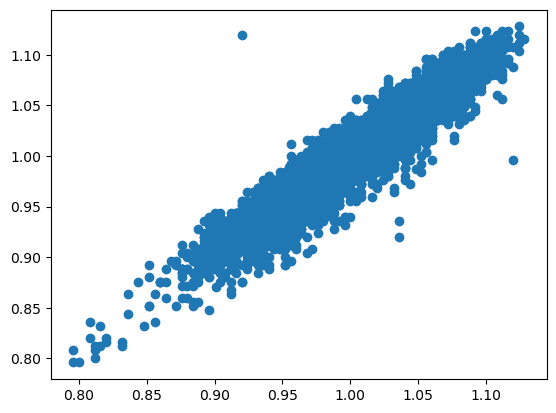

: 

In [9]:
plt.scatter(x=N_type['rr']/1000,y=N_type['rr_next']/1000)

In [49]:
np.sqrt(N_type['diff_squared'].sum()/(N_type.shape[0]-1))


15.542765743724175

In [5]:
def calculate_HRV_metrics(file_in):
    # your code here


    return results

In [ ]:
file="D:\\Data Science\\Intro to Data Science\\Coursework\\dataset\\o01.csv"
calculate_HRV_metrics(file)


In [ ]:
def process_HRV_files(file_list_in, file_out):
    # your code here
    
    return  